In [1]:
# Analyze gaps in IS
# run_table3b.sh
import matplotlib.pyplot as plt
from utils import load_obj
import numpy as np

In [2]:
root_tlnmf = '../results_nonstationary440_sim1_5k/'
root_jd = '../results_jd_best2/nonstationary440_sim1_5k_rseed100_itl100_inmf1000_nbrun10_me/'

Sout = [1,10,100,1000,5000]
tlname = ['tlnmf2_best2_itl100_Ttl1_Tnmf10_epsnmf5e-07_epsc5e-07_ws40ms_me_nbrun10/tlnmf2_sci_batch_K2_S1_win4',
          'tlnmf2_best2_itl100_Ttl1_Tnmf10_epsnmf5e-07_epsc5e-07_ws40ms_me_nbrun10/tlnmf2_sci_batch_K2_S10_win4',
          'tlnmf2_best2_itl100_Ttl1_Tnmf10_epsnmf5e-07_epsc5e-07_ws40ms_me_nbrun10/tlnmf2_sci_batch_K2_S100_win4',
          'tlnmf2_best2_itl100_Ttl1_Tnmf10_epsnmf5e-07_epsc5e-07_ws40ms_me_nbrun10/tlnmf2_sci_batch_K2_S1000_win4',
          'tlnmf2_best2_itl100_Ttl1_Tnmf10_epsnmf5e-07_epsc5e-07_ws40ms_me_nbrun10/tlnmf2_sci_batch_K2_S5000_win4',
         ]
jdname = ['tlnmfJD2_sci_batch_K2_S1_win4_ws40ms_epsnmf5e-07_epsc5e-07_best',
          'tlnmfJD2_sci_batch_K2_S10_win4_ws40ms_epsnmf5e-07_epsc5e-07_best',
          'tlnmfJD2_sci_batch_K2_S100_win4_ws40ms_epsnmf5e-07_epsc5e-07_best',
          'tlnmfJD2_sci_batch_K2_S1000_win4_ws40ms_epsnmf5e-07_epsc5e-07_best',
          'tlnmfJD2_sci_batch_K2_S5000_win4_ws40ms_epsnmf5e-07_epsc5e-07_best',
         ]


In [3]:

jdout = [None] * len(Sout)
tlnmfout = [None] * len(Sout)
diff = [None] * len(Sout)
rseed = [100]
nbrun = 10


Ijds = [0] * len(Sout)
Idiffs = [0] * len(Sout)
if rseed[0]==100:
    for sid in range(len(Sout)):
        S = Sout[sid]
        if 1:
            jdout[sid] = jdname[sid] #  + '_S' + str(S) + '_rseed' + str(rseed[rid])
        tlnmfout[sid] = tlname[sid] # tlnmfname + '_S' + str(S) + '_rseed' + str(rseed[rid])        
    
    for sid in range(len(Sout)):
        #print('BEGIN')
        #print('sid',sid)
        S = Sout[sid]
        # load results from TL-NMF
        tlnmf = load_obj(root_tlnmf + tlnmfout[sid])
        tlnmf_alossC = tlnmf['alossC']
        tlnmf_alossL = tlnmf['alossL']
        tlnmf_alossI = tlnmf['alossISNMF']
        
        
        Ctlnmf_idx= np.argmin(tlnmf_alossC) # tlnmf['alossC'])
        if sid==0:
            print('S',S,'CS* is',tlnmf_alossC[Ctlnmf_idx])
        if 0:
            print('S',S,'Ctlnmf runid is ',Ctlnmf_idx, '; jdnmf runid is',jd['best_nmf_id'])

        #print('Is of tlnmf', tlnmf_alossI)
        
        if 0:
            plt.subplot(121)
            plt.plot(tlnmf_alossC)
            plt.title('Cs of tlnmf')
        
        if 1:
            # load results from JD
            jd = load_obj(root_jd + jdout[sid])
            #print(tlnmf['alossL'])
            #print(jd['alossC'])
            #break

            #plt.subplot(122)
            #plt.plot(jd['alossC'])
            #plt.title('Cs of jd+nmf')

            
            #print('S=',S, 'Is of jd+nmf',np.min(jd['alossISNMF']))
        
            Ijd = jd['alossISNMF'][jd['best_nmf_id']]
            Ljd = jd['best_lossL']
            Cjd = jd['alossC'][jd['best_nmf_id']]
            
            Ijds[sid] = Ijd
        
        Ctlnmf = tlnmf_alossC[Ctlnmf_idx] # tlnmf['alossC'][Ctlnmf_idx]
        Ltlnmf = tlnmf_alossL[Ctlnmf_idx] # ['alossL'][Ctlnmf_idx]
        Itlnmf = tlnmf_alossI[Ctlnmf_idx]
        #print('S',S, 'CS',Ctlnmf,'LS',Ltlnmf,'IS',Itlnmf)
        Idiffs[sid] = Ijd - Itlnmf

        if 1:
            #print('main:')
            #print('S=%d & Cjd-Ctlnmf=%.4g' % (S, Cjd-Ctlnmf)) # , Ctlnmf_LD[sid]-Jd_L[sid]) )        
            #print('S=%d & Ltlnmf-Ljd=%.4g' % (S, Ltlnmf-Ljd)) # , Ctlnmf_LD[sid]-Jd_L[sid]) )
            print('S= %d & Ijd-Itlnmf=%.4g' % (S,Ijd-Itlnmf))
            #print('supp:')
            print('S=%d & I_S(Phi_jd)=%.4g' % (S,Ijd))
            print('S=%d & I_S(Phi_tlnmf)=%.4g' % (S,Itlnmf))

        #print('END')

S 1 CS* is -405498.50297759054
S= 1 & Ijd-Itlnmf=505.6
S=1 & I_S(Phi_jd)=821.1
S=1 & I_S(Phi_tlnmf)=315.6
S= 10 & Ijd-Itlnmf=41.46
S=10 & I_S(Phi_jd)=70.06
S=10 & I_S(Phi_tlnmf)=28.6
S= 100 & Ijd-Itlnmf=0.01326
S=100 & I_S(Phi_jd)=3.677
S=100 & I_S(Phi_tlnmf)=3.664
S= 1000 & Ijd-Itlnmf=0.004451
S=1000 & I_S(Phi_jd)=2.991
S=1000 & I_S(Phi_tlnmf)=2.986
S= 5000 & Ijd-Itlnmf=0.004459
S=5000 & I_S(Phi_jd)=2.849
S=5000 & I_S(Phi_tlnmf)=2.845


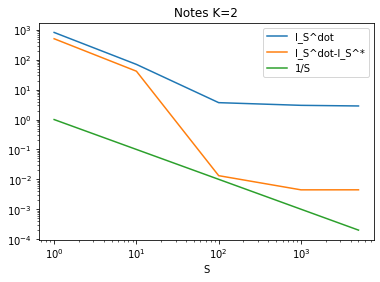

In [4]:
Is = [0] * len(Sout)
for sid in range(len(Sout)):
    Is[sid] = 1.0  / Sout[sid]
    
plt.plot(Sout,Ijds)
plt.plot(Sout,Idiffs)
plt.plot(Sout,Is)
plt.yscale('log')
plt.xscale('log')
plt.legend(['I_S^dot','I_S^dot-I_S^*','1/S'])
plt.xlabel('S')
plt.title('Notes K=2')
plt.show()